In [1]:
data = read.csv('shopping_data.csv')
print(head(data))
print(is.data.frame(data))
print(ncol(data))
print(nrow(data))

  CustomerID  Genre Age Annual.Income..k.. Spending.Score..1.100.
1          1   Male  19                 15                     39
2          2   Male  21                 15                     81
3          3 Female  20                 16                      6
4          4 Female  23                 16                     77
5          5 Female  31                 17                     40
6          6 Female  22                 17                     76
[1] TRUE
[1] 5
[1] 200


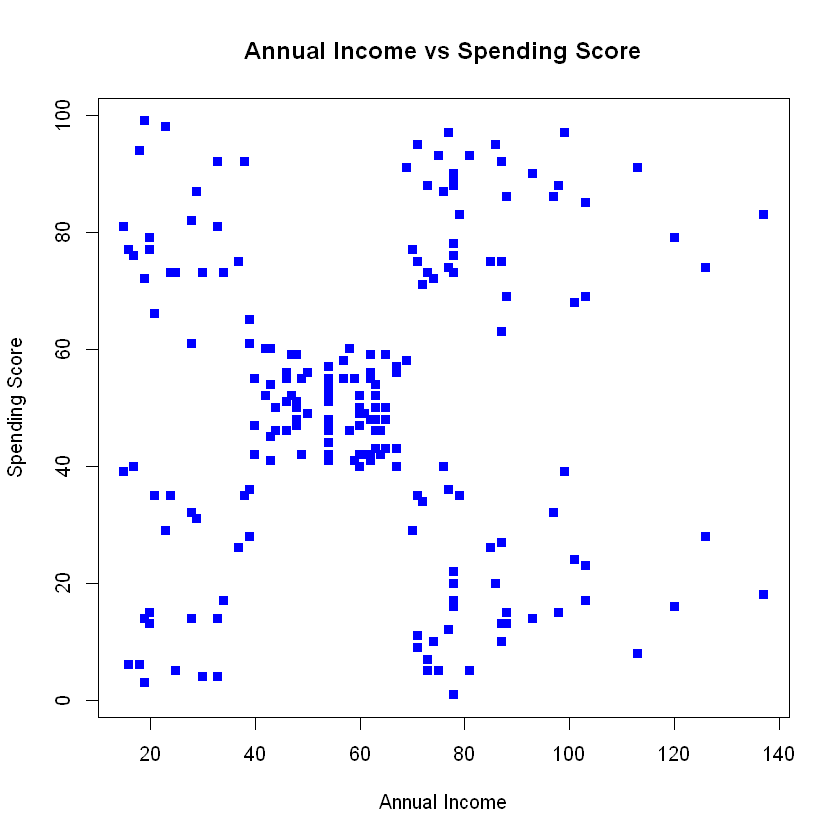

In [2]:
# Plot the chart
plot(x = data$Annual.Income..k.., y = data$Spending.Score..1.100., 
     xlab = 'Annual Income', 
     ylab = 'Spending Score', 
     main = 'Annual Income vs Spending Score',
     pch = 15, col = 'blue')

Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"


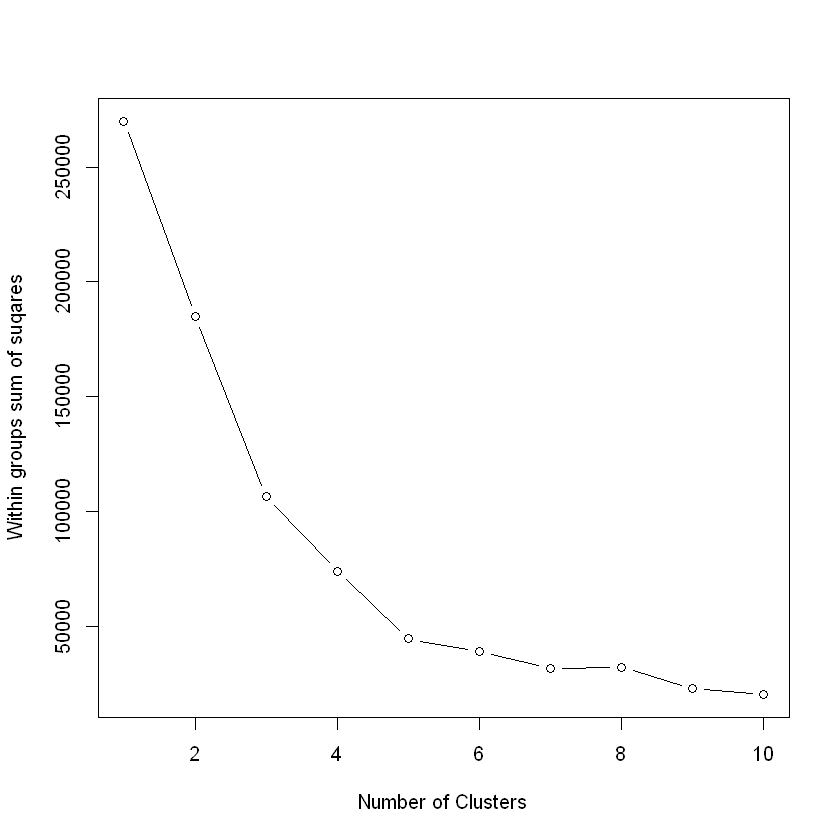

In [4]:
# finding k
# Determine number of clusters
mydata = data
wss = (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 1:10) wss[i] = sum(kmeans(mydata[, 4:5],
                                    centers=i)$withinss)
plot(1:10, wss, type='b', xlab='Number of Clusters',
     ylab='Within groups sum of suqares')

In [5]:
# clustering 
set.seed(20)
dataCluster = kmeans(mydata[, 4:5], 5, nstart=20)
dataCluster

K-means clustering with 5 clusters of sizes 81, 22, 39, 23, 35

Cluster means:
  Annual.Income..k.. Spending.Score..1.100.
1           55.29630               49.51852
2           25.72727               79.36364
3           86.53846               82.12821
4           26.30435               20.91304
5           88.20000               17.11429

Clustering vector:
  [1] 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 [38] 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 3 5 3 1 3 5 3 5 3 1 3 5 3 5 3 5 3 5 3 1 3 5 3 5 3
[149] 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
[186] 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3

Within cluster sum of squares by cluster:
[1]  9875.111  3519.455 13444.051  5098.696 12511.143
 (between_SS / total_SS =  83.5 %)

Available components:

[1] "cluster"      "centers"      "totss"    

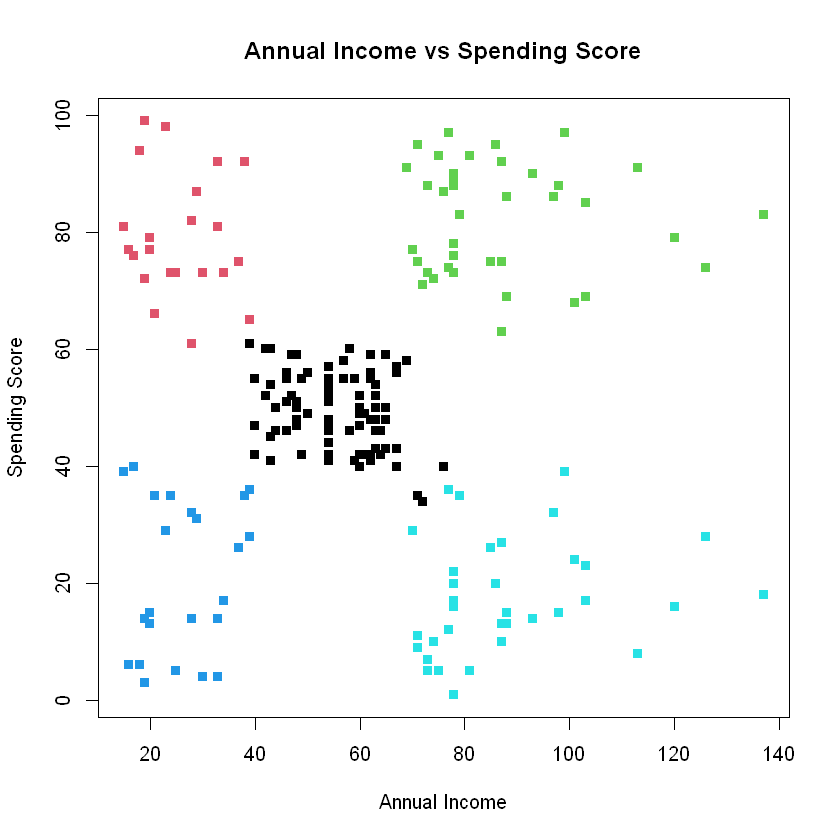

In [6]:
# Plot the chart
dataCluster$cluster = as.factor(dataCluster$cluster)
plot(x = data$Annual.Income..k.., y = data$Spending.Score..1.100., 
     xlab = 'Annual Income', 
     ylab = 'Spending Score', 
     main = 'Annual Income vs Spending Score',
     pch = 15, col = dataCluster$cluster)

In [7]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



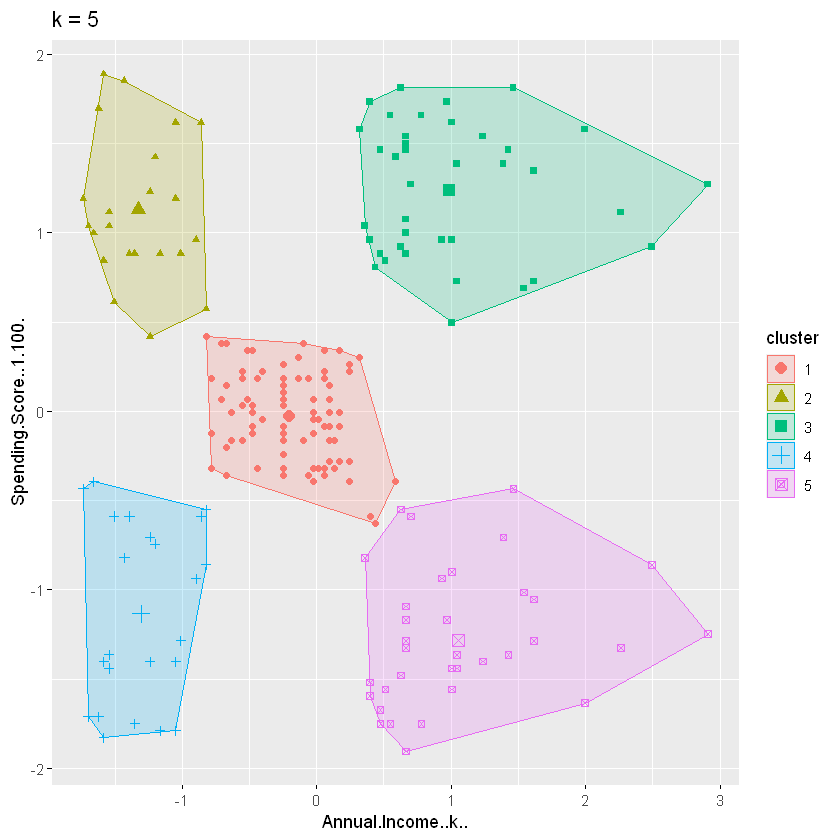

In [9]:
fviz_cluster(dataCluster, geom='point', data=mydata[,4:5]) +
ggtitle('k = 5')